Estimated number of clusters: 2
Cluster 0: Area Fraction = 0.9812
Cluster 1: Area Fraction = 0.0188


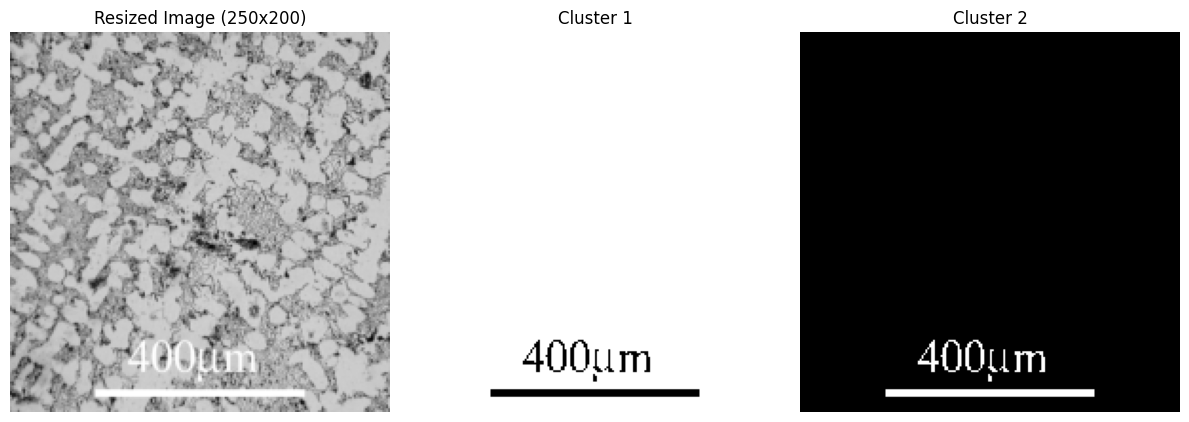

In [9]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from sklearn.cluster import MeanShift

# Load the image
image = io.imread('/Users/maniksinghsarmaal/Downloads/Non-Eutectic/000072.jpg')  # Replace 'your_image.jpg' with the path to your image

# Convert the image to grayscale
gray_image = image  # No need to convert if the image is already grayscale
image_len = image.shape[0]
image_width = image.shape[1]

# Proportionally resize the image to (250, 200)
scaled_image = transform.resize(gray_image, (int(image_len*0.4), int(image_width*0.4)), anti_aliasing=True)

# Flatten the scaled grayscale image to get pixel values
pixel_values = scaled_image.flatten().reshape(-1, 1)

# Perform Mean Shift clustering
ms = MeanShift()
ms.fit(pixel_values)

# Retrieve cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Determine the number of clusters
n_clusters_ = len(np.unique(labels))
print("Estimated number of clusters:", n_clusters_)

# Reshape labels to match the shape of the original image
labels_image = labels.reshape(scaled_image.shape)

# Create masks for each cluster
masks = [(labels_image == label) for label in range(n_clusters_)]

# Calculate area fraction for each cluster group
total_pixels = scaled_image.size
area_fractions = []
for label in range(n_clusters_):
    cluster_pixels = np.sum(labels_image == label)
    area_fraction = cluster_pixels / total_pixels
    area_fractions.append(area_fraction)
    print(f"Cluster {label}: Area Fraction = {area_fraction:.4f}")

# Generate unique colors for each cluster
unique_colors = plt.cm.nipy_spectral(labels / n_clusters_)

# Display original image and masks for each cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, n_clusters_ + 1, 1)
plt.imshow(scaled_image, cmap='gray')
plt.title('Resized Image (250x200)')
plt.axis('off')

for i, mask in enumerate(masks):
    plt.subplot(1, n_clusters_ + 1, i + 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Cluster {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
